<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/18_3_Class_Activation_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class Activation Map

https://alexisbcook.github.io/2017/global-average-pooling-layers-for-object-localization/

https://junstar92.tistory.com/152

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cv2

In [2]:
# Cats vs Dogs Dataset
tfds.disable_progress_bar()

splits = ['train[:80%]', 'train[80%:90%]', 'train[90%:]']

# load the dataset given the splits defined above
splits, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True, split = splits)
(train_examples, validation_examples, test_examples) = splits
num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes
BATCH_SIZE = 32

def normalize_and_resize(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.
    image = tf.image.resize(image, (224, 224))
    return image, label

# prepare batches
train_batches = train_examples.shuffle(num_examples // 4).map(normalize_and_resize).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches = validation_examples.map(normalize_and_resize).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_batches = test_examples.map(normalize_and_resize).batch(1)

Shuffling and writing examples to C:\Users\Jae\tensorflow_datasets\cats_vs_dogs\4.0.0.incompleteABNKNV\cats_vs_dogs-train.tfrecord
Dataset cats_vs_dogs downloaded and prepared to C:\Users\Jae\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [3]:
def build_model():
    base_model = tf.keras.applications.VGG16(input_shape= (224, 224, 3), 
                                             weights='imagenet', include_top=False)
    # add a GAP layer
    output = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    # output has two neurons for the 2 classes(dogs and cats)
    output = tf.keras.layers.Dense(2, activation='softmax')(output)
    # set the inputs and outputs of the model
    model = tf.keras.Model(base_model.input, output)
    
    for layer in base_model.layers[:-4]:
        layer.trainable = False
        
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])
    model.summary()
    
    return model

model = build_model()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [4]:
EPOCHS = 10
model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
582/582 [==============================] - ETA: 0s - loss: 1.5107 - acc: 0.7228WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000230E1A6A828> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
582/582 [==============================] - 50s 86ms/step - loss: 1.5107 - acc: 0.7228 - val_loss: 0.6415 - val_acc: 0.8280
Epoch 2/10
582/582 [==============================] - 49s 85ms/step - loss: 0.2110 - acc: 0.9269 - val_loss: 0.1455 - val_acc: 0.9355
Epoch 3/10
582/582 [==============================] - 50s 85ms/step - loss: 0.1608 - acc: 0.9484 - val_loss: 0.1238 - val_acc: 0.9544
Epoch 4/10
582/582 [==============================] - 49s 85ms/step - loss: 0.1172 - acc: 0.9584 - val_loss: 0.1288 - val_acc: 0.9540
Epoch 5/10
582/582 [==============================] - 49s 85ms/step - loss: 0.1160 - acc: 0.9635 - val_loss: 0.1299 - val_acc: 0.9544
Epoch 6/10
582/582 [==========

In [5]:
cam_model = tf.keras.Model(model.input, outputs=(model.layers[-3].output, model.layers[-1].output))
cam_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [6]:
class_weights = model.layers[-1].get_weights()[0]
class_weights.shape

(512, 2)

In [7]:
imgs = []
lbls = []

for img, lbl in test_batches.take(1):
    imgs.append(img)
    lbls.append(lbl)

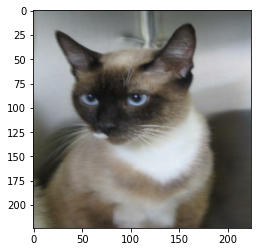

In [8]:
img_np = tf.squeeze(imgs[0])

plt.imshow(img_np)

In [9]:
features,results = cam_model.predict(img)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [10]:
features.shape

(1, 7, 7, 512)

In [11]:
results.shape

(1, 2)

In [12]:
label = results.argmax()

In [13]:
features_for_img = features[0]
prediction = results[0]
class_activation_weigths = class_weights[:,label]

In [14]:
class_activation_features = sp.ndimage.zoom(features_for_img, (224/7, 224/7, 1), order=2)

In [15]:
class_activation_features.shape

(224, 224, 512)

In [16]:
cam_output = np.dot(class_activation_features, class_activation_weigths)

In [17]:
cam_output.shape

(224, 224)

In [18]:
cam_output = tf.reshape(cam_output, (224,224))

cat


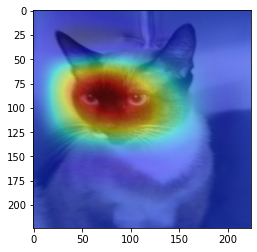

In [19]:
class_name = 'dog' if tf.argmax(results[0]) else 'cat'

print(class_name)

plt.imshow(tf.squeeze(imgs[0]))
plt.imshow(cam_output, cmap='jet', alpha=0.5)  
plt.show()